<b> Baigiamasis projektas - Mobiliojo telefono kainos klasifikavimas. <br>
   </b> Nuoroda į dataset: [https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv]

#  Įvadas.

Task: Perform multi-class classification.

In [30]:
# Duomenų ir reikiamų modulių importavimas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
from joblib import dump, load

# Machine Learning moduliai

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

data_path = pathlib.Path(r'C:\Users\taura\Downloads\archive (8)\train.csv')

train = pd.read_csv(r"C:\Users\taura\Downloads\archive (8)\train.csv", encoding="utf-8")

test = pd.read_csv(r"C:\Users\taura\Downloads\archive (8)\train.csv", encoding="utf-8")

# Informacija apie duomenų rinkinį.

In [2]:
train.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

<b> Išvada: Visi kintamieji yra skaitinio tipo, tačiau dauguma jų yra kategorinės prigimties.

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Duomenų išvalymas.

## Nulinės vertės.

In [6]:
train.isnull().sum().sum()

0

## Dublikuotos vertės.

In [7]:
train.duplicated().sum()

0

# Nepriklausomų kintamųjų parinkimas.

In [8]:
x = [train.columns]
x

[Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
        'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
        'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
        'touch_screen', 'wifi', 'price_range'],
       dtype='object')]

In [9]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
train1 = train.drop(['blue', 'four_g', 'dual_sim', 'm_dep', 'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1)
train1.head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,141,2,14,1208,1212,1411,8,2,15


<Figure size 1600x800 with 0 Axes>

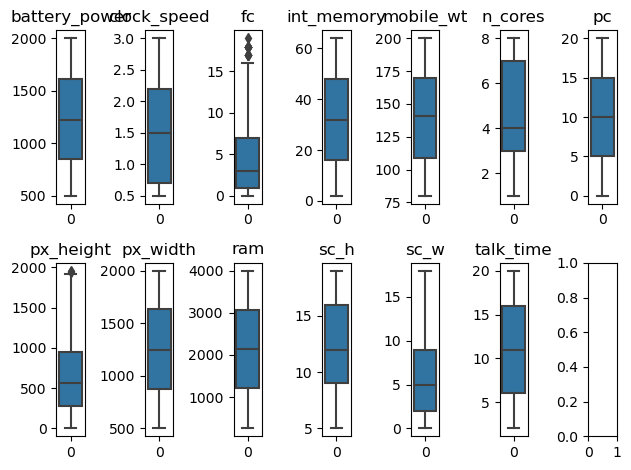

In [11]:
plt.figure(figsize=(16, 8))
fig, axes = plt.subplots(2, 7)

for i, ax in enumerate(axes.flat):
    if i < len(train1.columns):
        column_name = train1.columns[i]
        ax.set_title(column_name)
        sns.boxplot(train1[column_name], ax=ax)

plt.tight_layout()
plt.show()

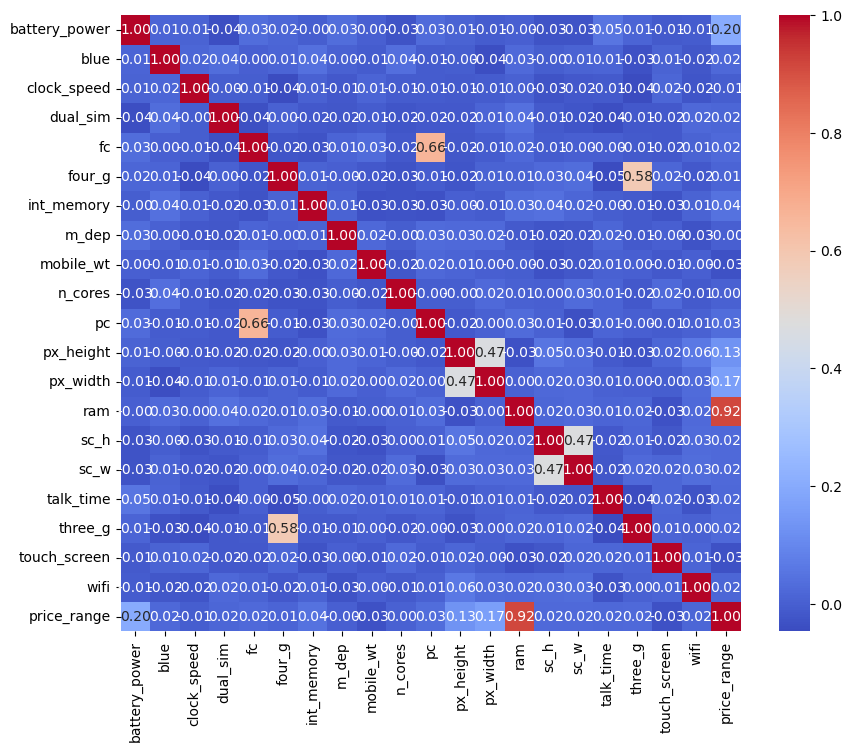

In [12]:
# Atliekame porinę koreliaciją tarp kintamųjų

corr_matrix = train.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [13]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if (corr_matrix.iloc[i,j] > 0.6 and corr_matrix.iloc[i,j] < 1) or (corr_matrix.iloc[i,j] < -0.6 and corr_matrix.iloc[i,j] > -1):
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))


if high_corr_pairs:
    print(f"Išvada: Poros su didele teigiama arba neigiama koreliacija: (-1 iki -0.6 ir 0.6 iki 1):\n")
    for pair in high_corr_pairs:
        print(pair)
else:
    print("Nėra porų su didele koreliacija.")

Išvada: Poros su didele teigiama arba neigiama koreliacija: (-1 iki -0.6 ir 0.6 iki 1):

('fc', 'pc')
('ram', 'price_range')


Išvada:
Didelę koreliaciją su priklausomu kintamuoju turi telefono RAM dydis.
Kita koreliacija (tarp priekinės kameros MPX ir galinės) nėra reikšminga tyrimui.

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

# Pasirenkame 5 geriausius kintamuosius pagal koreliacijos koeficientus

selector = SelectKBest(score_func=f_regression,k=5)
X_new = selector.fit_transform(train.drop(['price_range'], axis=1), train['price_range'])

# Pasirinkti kintamieji:
features = train.drop(['price_range'], axis=1).columns[selector.get_support()]
features

Index(['battery_power', 'int_memory', 'px_height', 'px_width', 'ram'], dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_new, train['price_range'], test_size=0.2, random_state=42)

In [19]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=50,
                                                        min_samples_split=5,
                                                        min_samples_leaf=2,
                                                        n_jobs=-1)))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [20]:
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("%s: %.3f%%" % (name, acc * 100))

    
    report = classification_report(y_test, y_pred)
    print("Classification Report for", name)
    print(report)
    print("-----------------------")

C:\Users\taura\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 84.000%
Classification Report for LR
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       105
           1       0.74      0.70      0.72        91
           2       0.68      0.71      0.70        92
           3       0.93      0.94      0.93       112

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400

-----------------------
KNN: 94.500%
Classification Report for KNN
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.90      0.91      0.91        92
           3       0.97      0.95      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.95       400

----------------------

Geriausias modelis:

SVC: 96.500%
Classification Report for SVC
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.94      1.00      0.97        91
           2       0.93      0.93      0.93        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400

# Deep Learning Model.


In [21]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers


data = pd.read_csv(r'C:\Users\taura\Downloads\archive (8)\train.csv')

data = data.dropna()

features = data.drop(['price_range'], axis=1)
target = pd.get_dummies(data['price_range']).values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Naudojame StandarScaler duomenu suvienodinimui
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Deep Learning modelio sukūrimas
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

# Modelio kompiliavimas
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Modelio įvertinimas
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/10
50/50 [==============================] - 3s 17ms/step - loss: 1.3724 - accuracy: 0.3119 - val_loss: 1.1936 - val_accuracy: 0.5275
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 1.0729 - accuracy: 0.5225 - val_loss: 0.7802 - val_accuracy: 0.6800
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.7656 - accuracy: 0.6544 - val_loss: 0.5202 - val_accuracy: 0.7900
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6184 - accuracy: 0.7156 - val_loss: 0.4151 - val_accuracy: 0.8250
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.5362 - accuracy: 0.7487 - val_loss: 0.3337 - val_accuracy: 0.8725
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4462 - accuracy: 0.8006 - val_loss: 0.2829 - val_accuracy: 0.8950
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.3926 - accuracy: 0.8250 - val_loss: 0.2541 - val_accuracy: 0.9000
Epoch 8/10
50/50 [=

# Modelio išsaugojimas naudojimui

In [38]:
dump(selector, data_path.parent.joinpath("preprocessing.joblib"))
dump(SVC, data_path.parent.joinpath("SVC.joblib"))

['C:\\Users\\taura\\Downloads\\archive (8)\\SVC.joblib']

In [39]:
loaded_processing = load(data_path.parent.joinpath("preprocessing.joblib"))
loaded_model = load(data_path.parent.joinpath("SVC.joblib"))